# Pymaceuticals Inc.
---

### Analysis

- Obersvation #1: According to the box plots near the end of the analysis the drugs Capomulin and Ramicane apear to be much more effective at reducing the tumor volume of the rat at the end of the study.
- Obersvation #2: There is a high correclation betwen mouse weight and tumor volume, as evidenced by the last graph generated for the analysis.
- Obersvation #3: the drug Propriva seems to be the drug associated with the smallest tumor volume, per the average.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

complete_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')
print(type(complete_results))

# Display the data table for preview
complete_results

<class 'pandas.core.frame.DataFrame'>


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
# Checking the number of mice.

# THIS RETURNS THE NUMBER OF ROWS X THE NUMBER OF COLUMNS, ACTUALLY
# total_mice = mouse_metadata.size
# print(total_mice)

# total_mice = len(mouse_metadata["Mouse ID"])
# print(total_mice)

total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_array = complete_results.loc[complete_results.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_array


array(['g989'], dtype=object)

In [60]:
complete_results.duplicated(subset = ['Mouse ID', 'Timepoint'])

complete_results.loc[complete_results.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
all_g989_data = complete_results.loc[complete_results['Mouse ID'] == 'g989']
all_g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# TUTOR STOPPED HELPING ME HERE

complete_results_cleaned = complete_results[complete_results['Mouse ID'].isin(duplicate_array) == False]
complete_results_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [63]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned = len(complete_results_cleaned["Mouse ID"].unique())
total_mice_cleaned

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = complete_results_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = complete_results_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = complete_results_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_sd = complete_results_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = complete_results_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Average Tumor Volume":tumor_mean,
                                   "Median Tumor Volume":tumor_median,
                                   "Tumor Volume Variance":tumor_variance,
                                   "Tumor Volume Std. Dev.":tumor_sd,
                                   "Tumor Volume Std. Err.":tumor_sem})
summary_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_aggregate = complete_results_cleaned.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
tumor_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [66]:
# Counting how many times each drug is used

xtimes_drug_used = complete_results_cleaned['Drug Regimen'].value_counts()
xtimes_drug_used

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

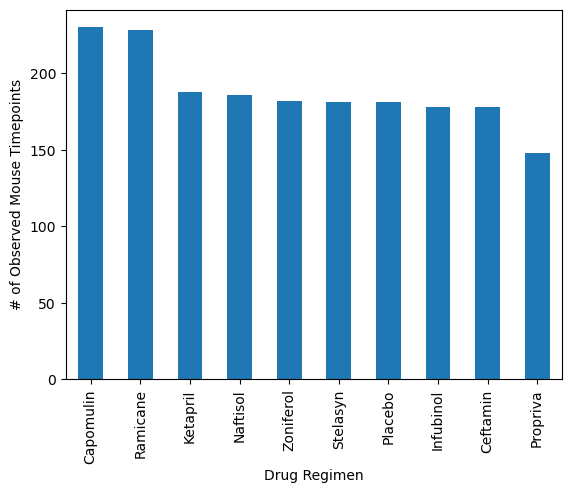

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

xtimes_drug_used.plot.bar(ylabel = "# of Observed Mouse Timepoints", xlabel = "Drug Regimen")


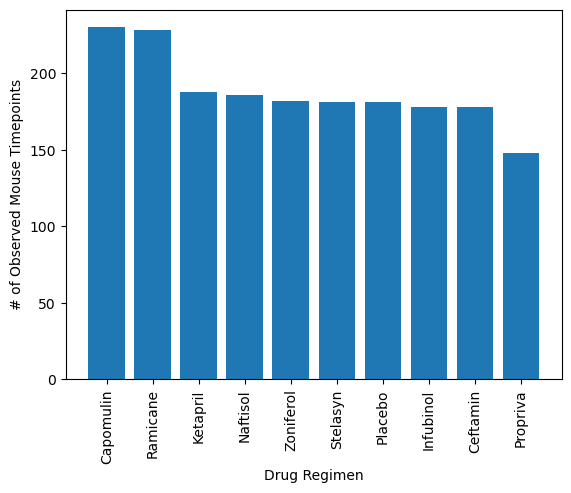

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(xtimes_drug_used.index,xtimes_drug_used)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

<Axes: ylabel='Sex'>

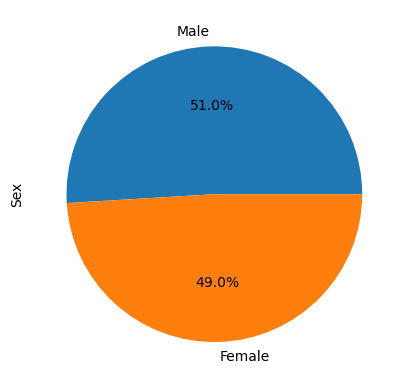

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mf_values = complete_results_cleaned["Sex"].value_counts()
# print(mf_values)

pie_plot = mf_values.plot(kind='pie', autopct="%1.1f%%")
pie_plot

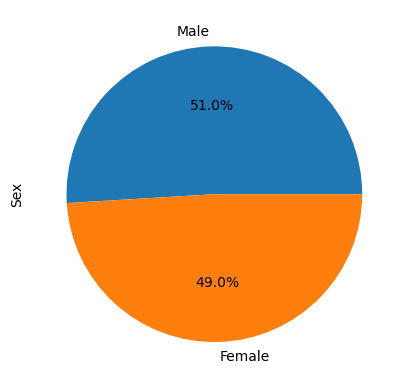

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mf_values, labels=mf_values.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_timepoint = complete_results_cleaned.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
complete_with_final_tumor_v = pd.merge(final_timepoint,complete_results_cleaned,on=['Mouse ID','Timepoint'])
complete_with_final_tumor_v

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [72]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_considered = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for value in treatments_considered:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_per_drug = complete_with_final_tumor_v.loc[complete_with_final_tumor_v['Drug Regimen'] == value]["Tumor Volume (mm3)"]
    

    # add subset 

    tumor_vol_data.append(tumor_volume_per_drug)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_volume_per_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")

print(len(tumor_vol_data))

4


Text(0, 0.5, 'Tumor Volume')

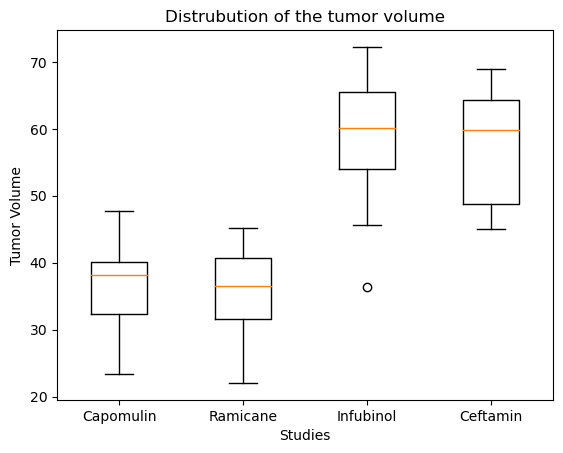

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments_considered)

plt.title("Distrubution of the tumor volume")
plt.xlabel("Studies")
plt.ylabel("Tumor Volume")



## Line and Scatter Plots

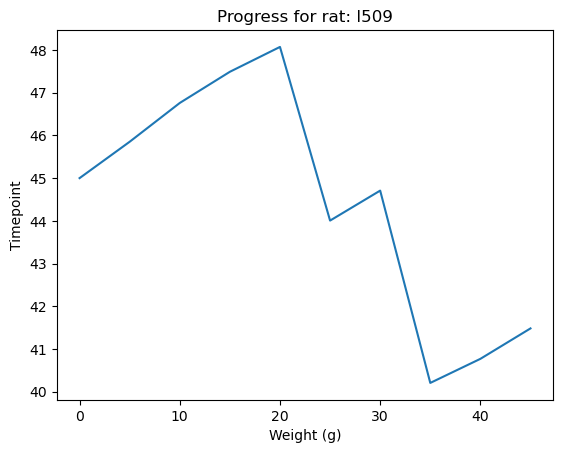

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# timepoints = np.arange(0,max(complete_with_final_tumor_v['Timepoint']),5)


# SELECTR TREATMENT AND MOUSE
treatment = "Capomulin"
mouse_id_select = "l509"



filtered_for_plot = complete_results_cleaned.loc[complete_results_cleaned['Drug Regimen'] == treatment,:]
filtered_for_plot = filtered_for_plot.loc[filtered_for_plot["Mouse ID"] == mouse_id_select,:]

plt.plot(filtered_for_plot['Timepoint'], filtered_for_plot['Tumor Volume (mm3)'])

plt.title("Progress for rat: " + mouse_id_select)

plt.xlabel("Weight (g)")
plt.ylabel("Timepoint")
plt.show()


Text(0, 0.5, 'Timepoint')

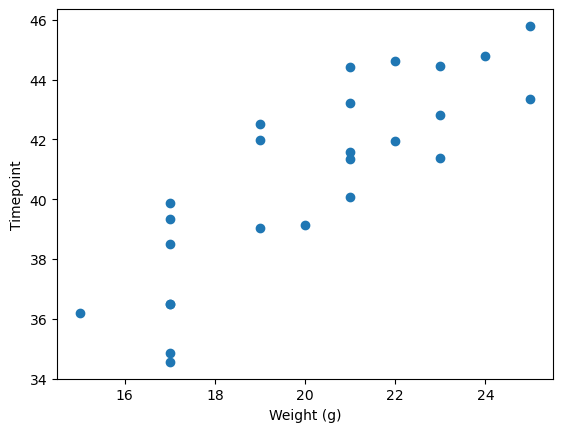

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment = "Capomulin"
mouse_id_select = "l509"

filtered_for_scatter = complete_results_cleaned.loc[complete_results_cleaned['Drug Regimen'] == treatment]
filtered_for_scatter = filtered_for_scatter.groupby(["Mouse ID"])[["Tumor Volume (mm3)","Weight (g)"]].mean()

x_axis_scatter = filtered_for_scatter["Weight (g)"]
y_axis_scatter = filtered_for_scatter["Tumor Volume (mm3)"]

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Timepoint")


# filtered_for_scatter

## Correlation and Regression

The correlation coefficient between Mouse Weight and Tumor Volume (3mm) is 0.84


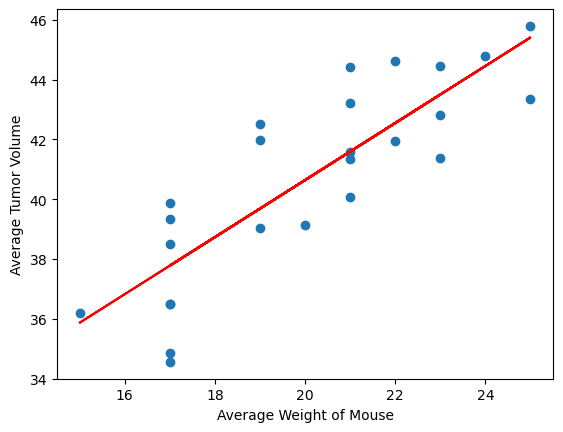

In [85]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation coefficient between Mouse Weight and Tumor Volume (3mm) is {round(st.pearsonr(x_axis_scatter,y_axis_scatter)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)

regress_values = x_axis_scatter * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis_scatter,y_axis_scatter)
plt.plot(x_axis_scatter, regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight of Mouse')
plt.ylabel('Average Tumor Volume')
plt.show()

